In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('wine_data.csv',usecols=['class_label','alcohol','malic_acid'])

In [5]:
df

,class_label,alcohol,malic_acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


C:\Users\spree\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='alcohol', ylabel='Density'>

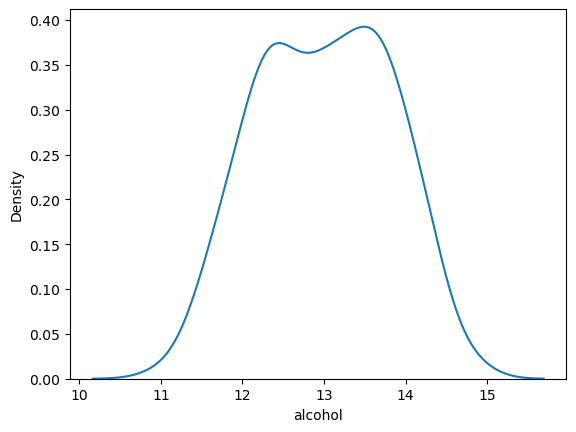

In [6]:
sns.kdeplot(data=df,x='alcohol')

<Axes: xlabel='alcohol', ylabel='malic_acid'>

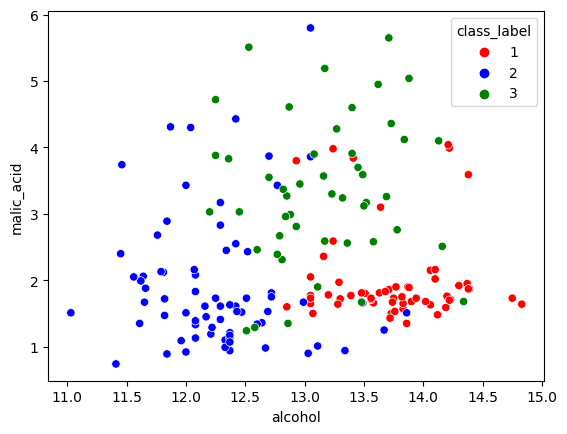

In [7]:
color={1:'red',2:'blue',3:'green'}
sns.scatterplot(data=df,x='alcohol',y='malic_acid',hue='class_label',palette=color)

In [8]:
from sklearn.model_selection import train_test_split as tts

In [9]:
X_train,X_test,Y_train,Y_test=tts(df.drop('class_label',axis=1),
                                 df['class_label'],
                                 test_size=0.3,
                                 random_state=0)
X_train.shape,X_test.shape

((124, 2), (54, 2))

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [17]:
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [18]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [19]:
np.round(X_train.describe(),1)

,alcohol,malic_acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [20]:
np.round(X_train_scaled.describe(),1)

,alcohol,malic_acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


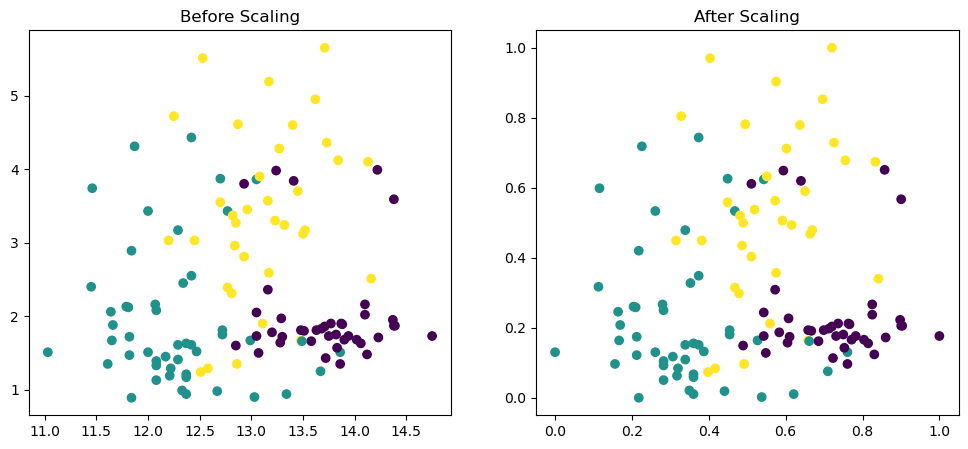

In [22]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title('Before Scaling')
ax1.scatter(X_train['alcohol'],X_train['malic_acid'],c=Y_train)
ax2.set_title('After Scaling')
ax2.scatter(X_train_scaled['alcohol'],X_train_scaled['malic_acid'],c=Y_train)
plt.show()

C:\Users\spree\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\spree\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\spree\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\spree\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

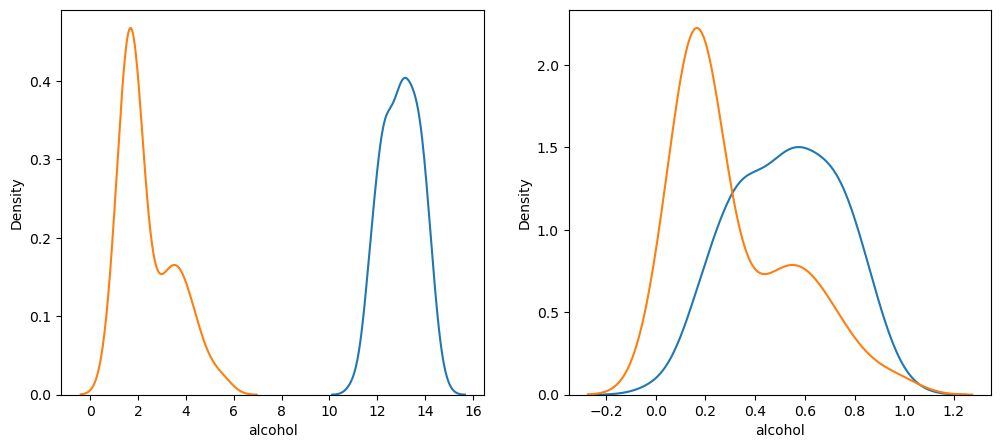

In [24]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title=('Before Scaling')
sns.kdeplot(X_train['alcohol'],ax=ax1)
sns.kdeplot(X_train['malic_acid'],ax=ax1)
ax2.set_title=('After Scaling')
sns.kdeplot(X_train_scaled['alcohol'],ax=ax2)
sns.kdeplot(X_train_scaled['malic_acid'],ax=ax2)
plt.show()